In [1]:
import ds_utils
import pandas as pd
df = pd.read_csv('train.csv')

y = df['Survived']
df = df.drop(columns=['Survived'])

train_num = len(df)
df = pd.concat((df, pd.read_csv('test.csv')))

In [2]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df['Name'].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [4]:
name = 'Allen, Mr. William Henry'
name_list = name.split(',')
name_list

['Allen', ' Mr. William Henry']

In [5]:
last_name = name_list[0]
last_name

'Allen'

In [6]:
name_list[1]

' Mr. William Henry'

In [7]:
name_list[1].strip()

'Mr. William Henry'

In [8]:
name_list[1].strip().split()

['Mr.', 'William', 'Henry']

In [9]:
name_list[1].strip().split()[0].split('.')[0]

'Mr'

In [10]:
name_list[1].strip().split()[1]

'William'

In [11]:
df['LastName'] = df['Name'].apply(lambda x: x.split(',')[0])
df['LastName'].head()

0       Braund
1      Cumings
2    Heikkinen
3     Futrelle
4        Allen
Name: LastName, dtype: object

In [12]:
df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0])
df['Title'].head()

0       Mr
1      Mrs
2     Miss
3      Mrs
4       Mr
Name: Title, dtype: object

In [13]:
df['Title'].unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer', ' Dona'], dtype=object)

In [14]:
df['FirstName'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[1].split(' ')[1])
df['FirstName'].head()

0       Owen
1       John
2      Laina
3    Jacques
4    William
Name: FirstName, dtype: object

In [15]:
ticket = 'STON/O2. 3101282'
ticket.split()

['STON/O2.', '3101282']

In [16]:
ticket2 = '113803'
ticket2.split()

['113803']

In [17]:
df['TicketDigits'] = df['Ticket'].apply(lambda x: x.split()[1] if len(x.split()) > 1 else x)

In [18]:
df = df.drop(columns=['Ticket', 'Name'])

In [19]:
df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,LastName,Title,FirstName,TicketDigits
0,1,3,male,22.0,1,0,7.2500,NaN,S,Braund,Mr,Owen,21171
1,2,1,female,38.0,1,0,71.2833,C85,C,Cumings,Mrs,John,17599
2,3,3,female,26.0,0,0,7.9250,NaN,S,Heikkinen,Miss,Laina,3101282
3,4,1,female,35.0,1,0,53.1000,C123,S,Futrelle,Mrs,Jacques,113803
4,5,3,male,35.0,0,0,8.0500,NaN,S,Allen,Mr,William,373450


In [20]:
ds_utils.get_nan_col_proportions(df)

[('Age', 0.201), ('Fare', 0.001), ('Cabin', 0.775), ('Embarked', 0.002)]

In [21]:
import numpy as np

df['NanAge'] = df.apply(lambda row: 1 if row['Age'] == np.nan else 0, axis=1)

In [22]:
df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,LastName,Title,FirstName,TicketDigits,NanAge
0,1,3,male,22.0,1,0,7.2500,NaN,S,Braund,Mr,Owen,21171,0
1,2,1,female,38.0,1,0,71.2833,C85,C,Cumings,Mrs,John,17599,0
2,3,3,female,26.0,0,0,7.9250,NaN,S,Heikkinen,Miss,Laina,3101282,0
3,4,1,female,35.0,1,0,53.1000,C123,S,Futrelle,Mrs,Jacques,113803,0
4,5,3,male,35.0,0,0,8.0500,NaN,S,Allen,Mr,William,373450,0


In [23]:
df[df['Age'].isnull()].head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,LastName,Title,FirstName,TicketDigits,NanAge
5,6,3,male,NaN,0,0,8.4583,NaN,Q,Moran,Mr,James,330877,0
17,18,2,male,NaN,0,0,13.0000,NaN,S,Williams,Mr,Charles,244373,0
19,20,3,female,NaN,0,0,7.2250,NaN,C,Masselmani,Mrs,Fatima,2649,0
26,27,3,male,NaN,0,0,7.2250,NaN,C,Emir,Mr,Farred,2631,0
28,29,3,female,NaN,0,0,7.8792,NaN,Q,O'Dwyer,Miss,Ellen,330959,0


In [24]:
df['NanFare'] = df.apply(lambda row: 1 if row['Fare'] == np.nan else 0, axis=1)
df['NanEmbarked'] = df.apply(lambda row: 1 if row['Embarked'] == np.nan else 0, axis=1)

In [25]:
embarked_not_null = df.copy()

In [26]:
embarked_not_null.dropna(subset=['Embarked']).head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,LastName,Title,FirstName,TicketDigits,NanAge,NanFare,NanEmbarked
0,1,3,male,22.0,1,0,7.2500,NaN,S,Braund,Mr,Owen,21171,0,0,0
1,2,1,female,38.0,1,0,71.2833,C85,C,Cumings,Mrs,John,17599,0,0,0
2,3,3,female,26.0,0,0,7.9250,NaN,S,Heikkinen,Miss,Laina,3101282,0,0,0
3,4,1,female,35.0,1,0,53.1000,C123,S,Futrelle,Mrs,Jacques,113803,0,0,0
4,5,3,male,35.0,0,0,8.0500,NaN,S,Allen,Mr,William,373450,0,0,0


In [27]:
embarked_not_null = embarked_not_null.dropna(subset=['Embarked'])

In [28]:
embarked_not_null['Embarked'] = embarked_not_null['Embarked'].astype('category').cat.codes.head()

In [29]:
ds_utils.print_moderate_correlations(embarked_not_null, 'Embarked')

SibSp :  -0.4999999999999999
Fare :  -0.45343239693969534


In [30]:
del embarked_not_null

In [31]:
attempt1 = df.groupby('Pclass')['Embarked'].transform(lambda x: x.fillna(x.mode()[0]))

In [32]:
ds_utils.replace_missing_with_ml(df, 'Embarked')

Successfully trained model to predict: Embarked
------Evaluation-------
ACC         :  0.7187


In [33]:
df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,LastName,Title,FirstName,TicketDigits,NanAge,NanFare,NanEmbarked
0,1,3,male,22.0,1,0,7.2500,NaN,S,Braund,Mr,Owen,21171,0,0,0
1,2,1,female,38.0,1,0,71.2833,C85,C,Cumings,Mrs,John,17599,0,0,0
2,3,3,female,26.0,0,0,7.9250,NaN,S,Heikkinen,Miss,Laina,3101282,0,0,0
3,4,1,female,35.0,1,0,53.1000,C123,S,Futrelle,Mrs,Jacques,113803,0,0,0
4,5,3,male,35.0,0,0,8.0500,NaN,S,Allen,Mr,William,373450,0,0,0


In [34]:
ds_utils.get_nan_col_proportions(df)

[('Age', 0.201), ('Fare', 0.001), ('Cabin', 0.775)]

In [35]:
ds_utils.replace_missing_with_ml(df, 'Fare')

Successfully trained model to predict: Fare
------Evaluation-------
R2          :  0.4211
RMSE        :  42.56


In [36]:
ds_utils.replace_missing_with_ml(df, 'Age')

Successfully trained model to predict: Age
------Evaluation-------
R2          :  0.3946
RMSE        :  10.22


In [37]:
df['Cabin'].head(10)

0     NaN
1     C85
2     NaN
3    C123
4     NaN
5     NaN
6     E46
7     NaN
8     NaN
9     NaN
Name: Cabin, dtype: object

In [38]:
import numpy as np
df['Cabin'] = df['Cabin'].fillna(' ')
df['CabinLetter'] = df.apply(lambda row: ' ' if row['Cabin'] == ' ' else row['Cabin'][0], axis=1)
df['CabinLetter'] = df['CabinLetter'].replace(to_replace=' ', value=np.nan)
df['NanCabinLetter'] = df.apply(lambda row: 1 if row['CabinLetter'] == np.nan else 0, axis=1)

In [39]:
df = df.drop(columns=['Cabin'])

In [40]:
df['CabinLetter'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [41]:
1/8

0.125

In [42]:
ds_utils.replace_missing_with_ml(df, 'CabinLetter')

Successfully trained model to predict: CabinLetter
------Evaluation-------
ACC         :  0.4189


In [43]:
# df['CabinLetter'] = df.groupby('Embarked')['CabinLetter'].transform(lambda x: x.fillna(x.mode()))

In [44]:
ds_utils.get_nan_col_proportions(df)

[]

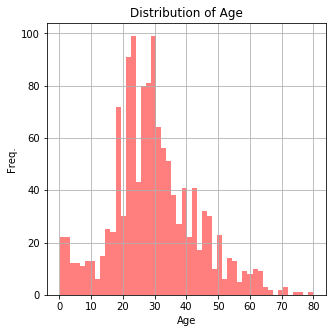

In [45]:
ds_utils.plot_hist_distribution(df, 'Age')

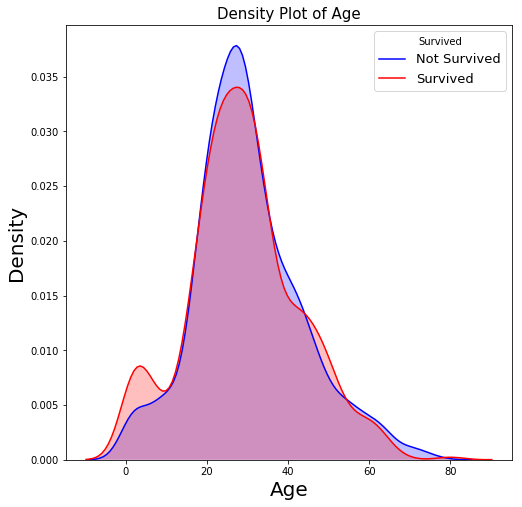

In [46]:
df['Survived'] = y
ds_utils.plot_binary_feature_distribution(df, 'Age', 'Survived')
df = df.drop(columns=['Survived'])

In [47]:
df['Infant'] = df['Age'].apply(lambda x: 1 if x <= 1 else 0)

df['Toddler'] = df['Age'].apply(lambda x: 1 if 1 <= x <= 4 else 0)

df['Child'] = df['Age'].apply(lambda x: 1 if 4 <= x <= 10 else 0)

df['Preteen'] = df['Age'].apply(lambda x: 1 if 10 <= x <= 13 else 0)

df['YoungTeen'] = df['Age'].apply(lambda x: 1 if 13 <= x <= 16 else 0)

df['YoungAdult'] = df['Age'].apply(lambda x: 1 if 16 <= x <= 21 else 0)

df['Adult'] = df['Age'].apply(lambda x: 1 if 21 <= x <= 30 else 0)

df['MidAdult'] = df['Age'].apply(lambda x: 1 if 30 <= x <= 40 else 0)

df['MiddleAged'] = df['Age'].apply(lambda x: 1 if 40 <= x <= 50 else 0)

df['Old'] = df['Age'].apply(lambda x: 1 if x >= 50 else 0)

In [48]:
df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,LastName,Title,...,Infant,Toddler,Child,Preteen,YoungTeen,YoungAdult,Adult,MidAdult,MiddleAged,Old
0,1,3,male,22.0,1,0,7.2500,S,Braund,Mr,...,0,0,0,0,0,0,1,0,0,0
1,2,1,female,38.0,1,0,71.2833,C,Cumings,Mrs,...,0,0,0,0,0,0,0,1,0,0
2,3,3,female,26.0,0,0,7.9250,S,Heikkinen,Miss,...,0,0,0,0,0,0,1,0,0,0
3,4,1,female,35.0,1,0,53.1000,S,Futrelle,Mrs,...,0,0,0,0,0,0,0,1,0,0
4,5,3,male,35.0,0,0,8.0500,S,Allen,Mr,...,0,0,0,0,0,0,0,1,0,0


In [49]:
def not_int(x: int):
    try:
        i = int(x)
        return None
    except ValueError:
        return x
    
results = df['TicketDigits'].apply(lambda x: not_int(x) if not_int(x) else None)
results.unique()

array([None, '2.', 'LINE', 'Basle'], dtype=object)

In [50]:
df.loc[df['TicketDigits'].str[-1] == '.'].head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,LastName,Title,...,Infant,Toddler,Child,Preteen,YoungTeen,YoungAdult,Adult,MidAdult,MiddleAged,Old
115,116,3,male,21.0,0,0,7.925,S,Pekoniemi,Mr,...,0,0,0,0,0,1,1,0,0,0
173,174,3,male,21.0,0,0,7.925,S,Sivola,Mr,...,0,0,0,0,0,1,1,0,0,0
243,244,3,male,22.0,0,0,7.125,S,Maenpaa,Mr,...,0,0,0,0,0,0,1,0,0,0
382,383,3,male,32.0,0,0,7.925,S,Tikkanen,Mr,...,0,0,0,0,0,0,0,1,0,0
400,401,3,male,39.0,0,0,7.925,S,Niskanen,Mr,...,0,0,0,0,0,0,0,1,0,0


In [51]:
df['TicketDigits'] = df['TicketDigits'].apply(lambda x: x if x[-1] != '.' else x[:-1])

In [52]:
df.loc[df['TicketDigits'].str[-1] == '.']

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,LastName,Title,...,Infant,Toddler,Child,Preteen,YoungTeen,YoungAdult,Adult,MidAdult,MiddleAged,Old


In [53]:
df['TicketDigits'] = df['TicketDigits'].apply(lambda x: 1 if x == 'LINE' else x)
df['TicketDigits'] = df['TicketDigits'].apply(lambda x: 0 if x == 'Basle' else x)

In [54]:
df['FamilySize'] = df['SibSp'] + df['Parch']

In [55]:
df['Alone'] = df['FamilySize'].apply(lambda x: 1 if x == 0 else 0)

In [56]:
df['Title'].unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer', ' Dona'], dtype=object)

In [57]:
df['Title'] = df['Title'].apply(lambda x: x.strip())
df['Title'] = df['Title'].apply(lambda x: x if x != 'Miss' else 'Ms')

In [58]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Ms', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Major',
       'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess', 'Jonkheer',
       'Dona'], dtype=object)

In [59]:
df['French'] = df['Title'].apply(lambda x: 1 if x in ['Mlle', 'Mme'] else 0)

In [60]:
df['Spanish'] = df['Title'].apply(lambda x: 1 if x in ['Don', 'Dona'] else 0)

In [61]:
df['Military'] = df['Title'].apply(lambda x: 1 if x in ['Capt', 'Col', 'Major'] else 0)

In [62]:
df['Nobility'] = df['Title'].apply(lambda x: 1 if x in ['Don', 'Sir', 'the Countess', 'Lady'] else 0)

In [63]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Ms', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Major',
       'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess', 'Jonkheer',
       'Dona'], dtype=object)

In [64]:
df['Title'] = df['Title'].apply(lambda x: x if x != 'Mlle' else 'Ms')

In [65]:
df['Title'] = df['Title'].apply(lambda x: x if x != 'Mme' else 'Mrs')

In [66]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Ms', 'Master', 'Don', 'Rev', 'Dr', 'Major', 'Lady',
       'Sir', 'Col', 'Capt', 'the Countess', 'Jonkheer', 'Dona'],
      dtype=object)

In [67]:
df['Age'].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [68]:
# Apr 14, 1912 – Apr 15, 1912
# 4 / 12 = 1/3 

In [69]:
df['YearBorn'] = df['Age'].apply(lambda x: 1912.333 - x).astype(int)

In [70]:
df['YearBorn'].head()

0    1890
1    1874
2    1886
3    1877
4    1877
Name: YearBorn, dtype: int64

In [71]:
def get_chinese_zodiac_sign(year):
    i = (year - 2000) % 12
    signs = {
        0 : 'Dragon',
        1 : 'Snake',
        2: 'Horse',
        3: 'Sheep',
        4: 'Monkey',
        5: 'Rooster',
        6: 'Dog',
        7: 'Pig',
        8: 'Rat',
        9: 'Ox',
        10: 'Tiger',
        11: 'Hare'
    }
    return signs[i]
    
get_chinese_zodiac_sign(1994)

'Dog'

In [72]:
df['ChineseZodiacSign'] = df['YearBorn'].apply(get_chinese_zodiac_sign)

In [73]:
df['ChineseZodiacSign'].head()

0    Tiger
1      Dog
2      Dog
3       Ox
4       Ox
Name: ChineseZodiacSign, dtype: object

In [74]:
df[df['Title'] == 'Jonkheer']

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,LastName,Title,...,MiddleAged,Old,FamilySize,Alone,French,Spanish,Military,Nobility,YearBorn,ChineseZodiacSign
822,823,1,male,38.0,0,0,0.0,S,Reuchlin,Jonkheer,...,0,0,0,1,0,0,0,0,1874,Dog


In [75]:
df[df['FirstName'].str.startswith('(')]['FirstName']

15          (Mary
66     (Elizabeth
166        (Edith
190        (Rosa)
259        (Lutie
272    (Elizabeth
327          (Ada
362    (Catherine
367     (Mantoura
483      (Hedwig)
516       (Amelia
556      (Lucille
564       (Marion
772        (Mary)
823       (Beila)
865    (Karolina)
153        (Hulda
199         (Lena
222       (Selena
241        (Alice
Name: FirstName, dtype: object

In [76]:
df['FirstName'] = df['FirstName'].apply(lambda x: x[1:] if x[0] == '(' else x)
df['FirstName'] = df['FirstName'].apply(lambda x: x[:-1] if x[-1] == ')' else x)

In [77]:
df['Embarked'] = df['Embarked'].astype('category')
df['LastName'] = df['LastName'].astype('category')
df['FirstName'] = df['FirstName'].astype('category')
df['Title'] = df['Title'].astype('category')
df['TicketDigits'] = df['TicketDigits'].astype(int)
df['CabinLetter'] = df['CabinLetter'].astype('category')
df['Sex'] = df['Sex'].astype('category')

In [78]:
df.dtypes

PassengerId             int64
Pclass                  int64
Sex                  category
Age                   float64
SibSp                   int64
Parch                   int64
Fare                  float64
Embarked             category
LastName             category
Title                category
FirstName            category
TicketDigits            int64
NanAge                  int64
NanFare                 int64
NanEmbarked             int64
CabinLetter          category
NanCabinLetter          int64
Infant                  int64
Toddler                 int64
Child                   int64
Preteen                 int64
YoungTeen               int64
YoungAdult              int64
Adult                   int64
MidAdult                int64
MiddleAged              int64
Old                     int64
FamilySize              int64
Alone                   int64
French                  int64
Spanish                 int64
Military                int64
Nobility                int64
YearBorn  

In [79]:
df = pd.get_dummies(df)

In [80]:
df.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,TicketDigits,NanAge,NanFare,NanEmbarked,...,ChineseZodiacSign_Hare,ChineseZodiacSign_Horse,ChineseZodiacSign_Monkey,ChineseZodiacSign_Ox,ChineseZodiacSign_Pig,ChineseZodiacSign_Rat,ChineseZodiacSign_Rooster,ChineseZodiacSign_Sheep,ChineseZodiacSign_Snake,ChineseZodiacSign_Tiger
0,1,3,22.0,1,0,7.2500,21171,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,38.0,1,0,71.2833,17599,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,3,26.0,0,0,7.9250,3101282,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,35.0,1,0,53.1000,113803,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,5,3,35.0,0,0,8.0500,373450,0,0,0,...,0,0,0,1,0,0,0,0,0,0


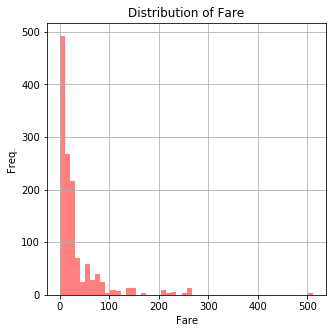

In [81]:
ds_utils.plot_hist_distribution(df, 'Fare')

In [ ]:
df['Survived'] = y
ds_utils.plot_binary_feature_distribution(df, 'Fare', 'Survived')
df = df.drop(columns=['Survived'])

In [83]:
df = ds_utils.adjust_skewness(df, 'Fare')

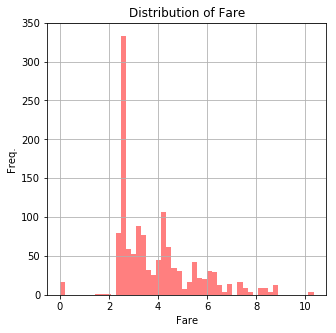

In [84]:
ds_utils.plot_hist_distribution(df, 'Fare')

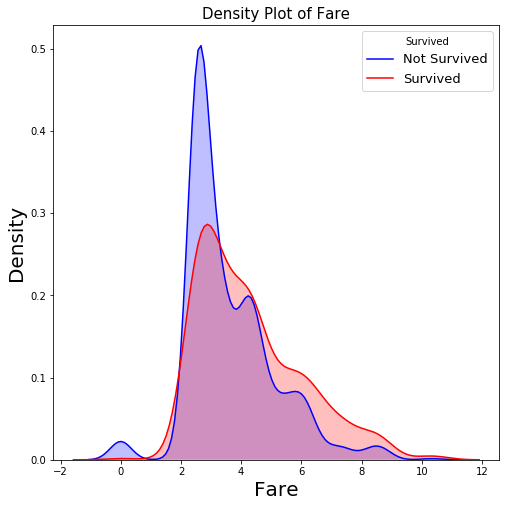

In [85]:
df['Survived'] = y
ds_utils.plot_binary_feature_distribution(df, 'Fare', 'Survived')
df = df.drop(columns=['Survived'])

In [86]:
df_train = df[:train_num].copy()
df_train['Survived'] = y
df_test = df[train_num:].copy()

In [87]:
df_train.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,TicketDigits,NanAge,NanFare,NanEmbarked,...,ChineseZodiacSign_Horse,ChineseZodiacSign_Monkey,ChineseZodiacSign_Ox,ChineseZodiacSign_Pig,ChineseZodiacSign_Rat,ChineseZodiacSign_Rooster,ChineseZodiacSign_Sheep,ChineseZodiacSign_Snake,ChineseZodiacSign_Tiger,Survived
0,1,3,22.0,1,0,2.482401,21171,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,1,38.0,1,0,6.002978,17599,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3,3,26.0,0,0,2.590967,3101282,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,35.0,1,0,5.464102,113803,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,5,3,35.0,0,0,2.610301,373450,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [88]:
df_train.to_csv('clean_train.csv', index=False)
df_test.to_csv('clean_test.csv', index=False)